In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [3]:
# load data
df = pd.read_excel('NewSandPdata - Q4.xlsx', parse_dates=[1], index_col=[0])
df = df[23:]
df.head()

,S&P,Daily Return,30-day rolling window Variance,30-day rolling window Volatility
Date,,,,
2013-08-23,1663.500000,0.003947,0.000031,0.005611
2013-08-26,1656.780029,-0.004040,0.000032,0.005666
2013-08-27,1630.479980,-0.015874,0.000032,0.005666
2013-08-28,1634.959961,0.002748,0.000042,0.006484
2013-08-29,1638.170044,0.001963,0.000043,0.006532


In [4]:
df.shape

(1256, 4)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S&P,1256.0,2182.146171,302.526294,1630.479980,1972.262543,2096.604981,2399.889893,2872.870117
Daily Return,1256.0,0.000462,0.007795,-0.040979,-0.002878,0.000531,0.004557,0.039034
30-day rolling window Variance,1256.0,0.000062,0.000062,0.000005,0.000024,0.000039,0.000072,0.000387
30-day rolling window Volatility,1256.0,0.007156,0.003270,0.002166,0.004877,0.006272,0.008484,0.019666


In [6]:
# Scale Data: MinMaxScaler each feature and save it as df_km
features = ['Daily Return', '30-day rolling window Volatility']
df_km = df.copy()[features]
scaler = MinMaxScaler()

df_km[features] = scaler.fit_transform(df_km[features])
df_km.head()

,Daily Return,30-day rolling window Volatility
Date,,
2013-08-23,0.561486,0.196874
2013-08-26,0.461669,0.200010
2013-08-27,0.313762,0.200004
2013-08-28,0.546497,0.246760
2013-08-29,0.536695,0.249501


Text(0, 0.5, 'Silhouette')

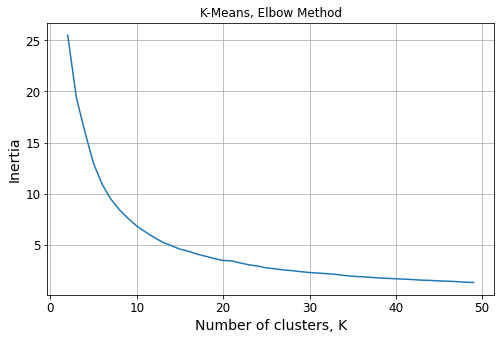

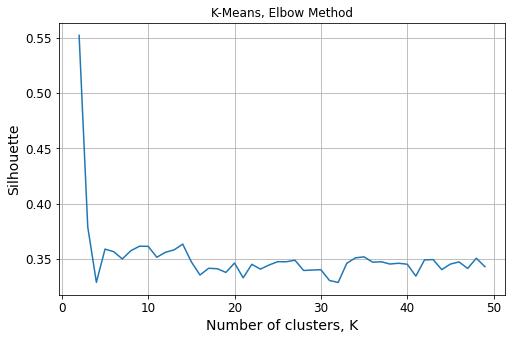

In [7]:
# K-means Clustering: try k from 2 to 50
inertias = {}
silhouettes = {}
for k in range (2, 50):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=1000, random_state=2021).fit(df_km)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(df_km, kmeans.labels_, metric='euclidean')

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method');
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia")

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method');
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette")

Text(0, 0.5, 'Silhouette')

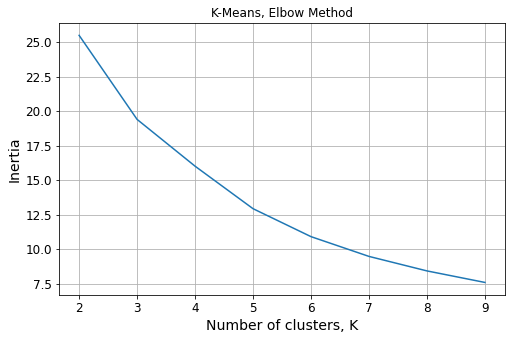

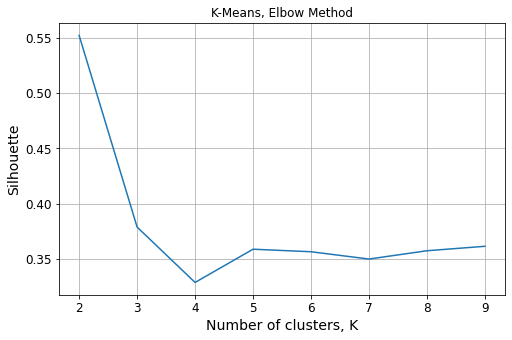

In [8]:
# K-means Clustering: limit scope and try k from 2 to 10
inertias = {}
silhouettes = {}
for k in range (2, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=1000, random_state=2021).fit(df_km)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(df_km, kmeans.labels_, metric='euclidean')

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method');
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia")

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method');
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette") 

In [14]:
# K-means Clustering: choose k=3 because S and I...
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=1000, random_state=2021).fit(df_km)
kmeans.fit
df['KMeans_clusters'] = kmeans.labels_
df.head()

,S&P,Daily Return,30-day rolling window Variance,30-day rolling window Volatility,KMeans_clusters
Date,,,,,
2013-08-23,1663.500000,0.003947,0.000031,0.005611,4
2013-08-26,1656.780029,-0.004040,0.000032,0.005666,3
2013-08-27,1630.479980,-0.015874,0.000032,0.005666,0
2013-08-28,1634.959961,0.002748,0.000042,0.006484,4
2013-08-29,1638.170044,0.001963,0.000043,0.006532,4


In [15]:
# only keep important features
df2 = df[features + ['KMeans_clusters']]
df2.head()

,Daily Return,30-day rolling window Volatility,KMeans_clusters
Date,,,
2013-08-23,0.003947,0.005611,4
2013-08-26,-0.004040,0.005666,3
2013-08-27,-0.015874,0.005666,0
2013-08-28,0.002748,0.006484,4
2013-08-29,0.001963,0.006532,4


In [16]:
# Interpreting the 5 clusters: find the K-centroids
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
data_km = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_km = pd.DataFrame({'Daily Return': data_km[:,0], '30-day rolling window Volatility': data_km[:,1]})
cluster_km['Number of Observations'] = df['KMeans_clusters'].value_counts()
cluster_km = cluster_km.rename(index={0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'})
print(cluster_km)

           Daily Return  30-day rolling window Volatility  \
Cluster 0     -0.011769                          0.007077   
Cluster 1     -0.001007                          0.015345   
Cluster 2      0.003954                          0.010788   
Cluster 3      0.000591                          0.004270   
Cluster 4      0.003166                          0.006797   

           Number of Observations  
Cluster 0                     140  
Cluster 1                      86  
Cluster 2                     188  
Cluster 3                     426  
Cluster 4                     416  


### Transition Matrix

In [20]:
# assemble cluster pairs ordered by time
cluster_pairs = []
df2_reset_index = df2.reset_index()
for index in df2_reset_index.index[:-1]:
    current_cluster = df2_reset_index.KMeans_clusters[index]
    next_cluster = df2_reset_index.KMeans_clusters[index+1]
    cluster_pairs.append([current_cluster, next_cluster])

# initialize counts
C0_0 = 0
C0_1 = 0
C0_2 = 0
C0_3 = 0
C0_4 = 0
C1_0 = 0
C1_1 = 0
C1_2 = 0
C1_3 = 0
C1_4 = 0
C2_0 = 0
C2_1 = 0
C2_2 = 0
C2_3 = 0
C2_4 = 0
C3_0 = 0
C3_1 = 0
C3_2 = 0
C3_3 = 0
C3_4 = 0
C4_0 = 0
C4_1 = 0
C4_2 = 0
C4_3 = 0
C4_4 = 0

# count the occurence of each pair
for pair in cluster_pairs:
    if pair == [0,0]:
        C0_0 += 1
    elif pair == [0,1]:
        C0_1 += 1
    elif pair == [0,2]:
        C0_2 += 1
    elif pair == [0,3]:
        C0_3 += 1
    elif pair == [0,4]:
        C0_4 += 1

    if pair == [1,0]:
        C1_0 += 1
    elif pair == [1,1]:
        C1_1 += 1
    elif pair == [1,2]:
        C1_2 += 1
    elif pair == [1,3]:
        C1_3 += 1
    elif pair == [1,4]:
        C1_4 += 1

    if pair == [2,0]:
        C2_0 += 1
    elif pair == [2,1]:
        C2_1 += 1
    elif pair == [2,2]:
        C2_2 += 1
    elif pair == [2,3]:
        C2_3 += 1
    elif pair == [2,4]:
        C2_4 += 1
        
    if pair == [3,0]:
        C3_0 += 1
    elif pair == [3,1]:
        C3_1 += 1
    elif pair == [3,2]:
        C3_2 += 1
    elif pair == [3,3]:
        C3_3 += 1
    elif pair == [3,4]:
        C3_4 += 1
        
    if pair == [4,0]:
        C4_0 += 1
    elif pair == [4,1]:
        C4_1 += 1
    elif pair == [4,2]:
        C4_2 += 1
    elif pair == [4,3]:
        C4_3 += 1
    elif pair == [4,4]:
        C4_4 += 1

from_0 = C0_0 + C0_1 + C0_2 + C0_3 + C0_4
from_1 = C1_0 + C1_1 + C1_2 + C1_3 + C1_4
from_2 = C2_0 + C2_1 + C2_2 + C2_3 + C2_4
from_3 = C3_0 + C3_1 + C3_2 + C3_3 + C3_4
from_4 = C4_0 + C4_1 + C4_2 + C4_3 + C4_4

In [22]:
# assemble everything into another table
transition_matrix = pd.DataFrame(columns=['From:', 'to Cluster 0', 'to Cluster 1', 'to Cluster 2', 'to Cluster 3', 'to Cluster 4'])
transition_matrix = transition_matrix.append(pd.Series(['Cluster 0', C0_0/from_0, C0_1/from_0, C0_2/from_0, C0_3/from_0, C0_4/from_0], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster 1', C1_0/from_1, C1_1/from_1, C1_2/from_1, C1_3/from_1, C1_4/from_1], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster 2', C2_0/from_2, C2_1/from_2, C2_2/from_2, C2_3/from_2, C2_4/from_2], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster 3', C3_0/from_3, C3_1/from_3, C3_2/from_3, C3_3/from_3, C3_4/from_3], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster 4', C4_0/from_4, C4_1/from_4, C4_2/from_4, C4_3/from_4, C4_4/from_4], index=transition_matrix.columns), ignore_index=True)
transition_matrix

,From:,to Cluster 0,to Cluster 1,to Cluster 2,to Cluster 3,to Cluster 4
0,Cluster 0,0.221429,0.014286,0.135714,0.050000,0.578571
1,Cluster 1,0.000000,0.837209,0.162791,0.000000,0.000000
2,Cluster 2,0.074468,0.063830,0.813830,0.000000,0.047872
3,Cluster 3,0.032941,0.000000,0.000000,0.934118,0.032941
4,Cluster 4,0.194712,0.000000,0.004808,0.052885,0.747596
